# Importing libraries & Packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading Data

In [3]:
data = pd.read_csv('USA_Housing.csv')

# Explore Data

In [4]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [7]:
data.sample(12)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1025,63655.181631,7.537024,7.292782,3.17,16409.116284,1.247661e+06,"960 Ferguson Ports Suite 436\nLake Denise, OK ..."
3735,75171.713801,6.204954,8.812218,6.14,40621.117068,1.874415e+06,"85731 Fowler Shores Apt. 056\nGarciaview, TN 9..."
1510,43526.814588,6.119019,6.274272,2.50,39760.206400,4.692628e+05,"5684 White Brooks\nPort Josephtown, AR 95549"
4790,73415.994500,6.375036,6.728146,4.05,41628.892736,1.479604e+06,"6009 Lewis Rapid Apt. 018\nDavisfurt, DE 04152"
3573,87255.000294,5.261800,7.103846,6.49,37348.286485,1.525206e+06,"8499 Garcia Point Apt. 965\nSouth Mariamouth, ..."
710,59716.736643,5.447705,7.336633,5.06,41273.009070,1.242979e+06,"7099 Shane Trail Apt. 259\nPinedaborough, GU 9..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
3985,71103.175721,5.676346,8.039884,5.24,59442.375586,1.518788e+06,"88096 Campbell Coves Apt. 230\nRussellchester,..."
1136,67043.195346,5.954846,5.935619,4.22,53738.626895,1.443027e+06,"60943 Travis Station Suite 213\nJacobton, NM 9..."
2841,61088.393614,5.810725,6.085444,2.18,40426.835168,1.019881e+06,"9649 Caitlyn Meadows Suite 390\nMcdowellside, ..."


In [8]:
data[['Price','Address']]

,Price,Address
0,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,1.260617e+06,USS Barnett\nFPO AP 44820
4,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...
4995,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,1.198657e+06,USS Wallace\nFPO AE 73316


In [9]:
#Check if the price is more than 125000$ 
data.Price >= 1250000

0       False
1        True
2       False
3        True
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999     True
Name: Price, Length: 5000, dtype: bool

In [10]:
#Show the data if the price is more than 125000$ ...
data[data.Price >= 1250000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025
...,...,...,...,...,...,...,...
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"


# Cleaning Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<AxesSubplot:>

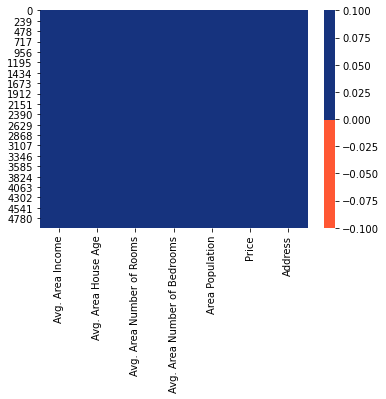

In [12]:
#1: Missing Data Heatmap
cols = data.columns[:4999] 
colours = ['#FF5733', '#16337E']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [13]:
#2: Missing Data Percentage List
# % of missing.
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Avg. Area Income - 0%
Avg. Area House Age - 0%
Avg. Area Number of Rooms - 0%
Avg. Area Number of Bedrooms - 0%
Area Population - 0%
Price - 0%
Address - 0%


* After Cleaning Data ...
        - No missing values in the dataset
        - All numerical features but 'Address'

# Descriptive statistics

In [14]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [15]:
data["Price"].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [16]:
# check the first , second ,and third Quantiles ...
quantiles = [data["Price"].quantile(0),   
            data["Price"].quantile(0.25),
           data["Price"].quantile(0.50),
            data["Price"].quantile(0.75),
           data["Price"].quantile(1)]

quantiles

[15938.657923287848,
 997577.1350487601,
 1232669.3779657914,
 1471210.2042115545,
 2469065.5941747027]

In [17]:
#print the mean of column group by Avg. Area Income ...
data.groupby('Avg. Area Income').mean()

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,,,,,
17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05
35454.714659,6.855708,6.018647,4.50,59636.402553,1.077806e+06
35608.986237,6.935839,7.827589,6.35,20833.007623,4.493316e+05
35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05
35963.330809,3.438547,8.264122,3.28,24435.777302,1.430274e+05
...,...,...,...,...,...
101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06
101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06
102881.120902,6.471249,5.693536,3.12,21051.531294,1.754938e+06


In [18]:
#print the mean of column group by Price ...
data.groupby('Price').mean()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
Price,,,,,
1.593866e+04,47320.657205,3.558054,7.006987,3.16,15776.618595
3.114052e+04,37971.207566,4.291224,5.807510,3.24,33267.767728
8.859177e+04,60167.672607,4.590613,3.950973,4.06,16811.303292
1.430274e+05,35963.330809,3.438547,8.264122,3.28,24435.777302
1.515271e+05,48735.924512,5.543730,6.091906,2.43,19682.347295
...,...,...,...,...,...
2.318286e+06,94733.971275,7.885829,7.162373,5.41,46314.690046
2.330290e+06,83814.101156,8.571797,7.392164,3.39,51538.056796
2.332111e+06,107701.748378,7.143522,8.518608,3.29,37619.439929


In [19]:
#print the mean of feature group by Price for one feature Avg. Area Income ...
data.groupby('Price').mean()[['Avg. Area Income']]

,Avg. Area Income
Price,
1.593866e+04,47320.657205
3.114052e+04,37971.207566
8.859177e+04,60167.672607
1.430274e+05,35963.330809
1.515271e+05,48735.924512
...,...
2.318286e+06,94733.971275
2.330290e+06,83814.101156
2.332111e+06,107701.748378


In [20]:
#Median for all features ...
data.median()

Avg. Area Income                6.880429e+04
Avg. Area House Age             5.970429e+00
Avg. Area Number of Rooms       7.002902e+00
Avg. Area Number of Bedrooms    4.050000e+00
Area Population                 3.619941e+04
Price                           1.232669e+06
dtype: float64

In [21]:
#Standard Devation for all features...
data.std()

Avg. Area Income                 10657.991214
Avg. Area House Age                  0.991456
Avg. Area Number of Rooms            1.005833
Avg. Area Number of Bedrooms         1.234137
Area Population                   9925.650114
Price                           353117.626581
dtype: float64

In [22]:
#Standard Devation for (Price) feature ...
data['Price'].std()

353117.6265810608

In [23]:
# the correlation for all features...
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


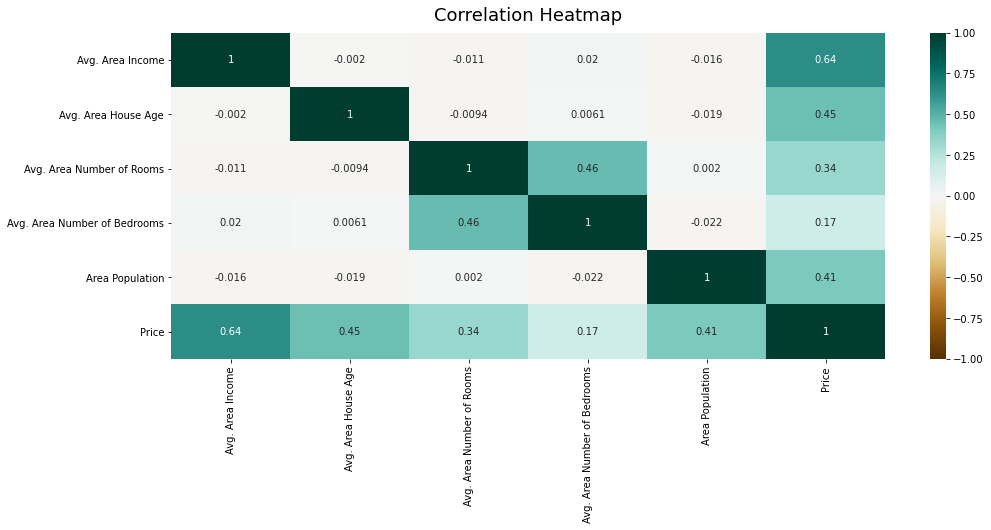

In [24]:
# plot the correlation for all features ...
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [25]:
#Correlation between Price and other features ...
data.corr()[['Price']].sort_values(by='Price', ascending=False)

,Price
Price,1.000000
Avg. Area Income,0.639734
Avg. Area House Age,0.452543
Area Population,0.408556
Avg. Area Number of Rooms,0.335664
Avg. Area Number of Bedrooms,0.171071


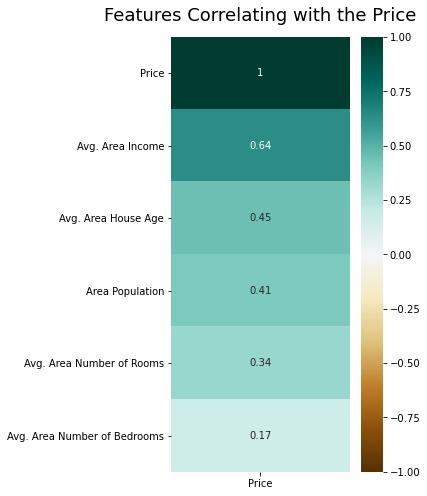

In [26]:
# plot the correlation between Price and the other features ...
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(data.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Price', fontdict={'fontsize':18}, pad=16);

* After correlartion heatmap there is ...
   - Modrate positive relation between Price & Avg. Area Income.
   - Weak positive relation between Price & all other features . (Based on The TextBook)


# Data Visualization

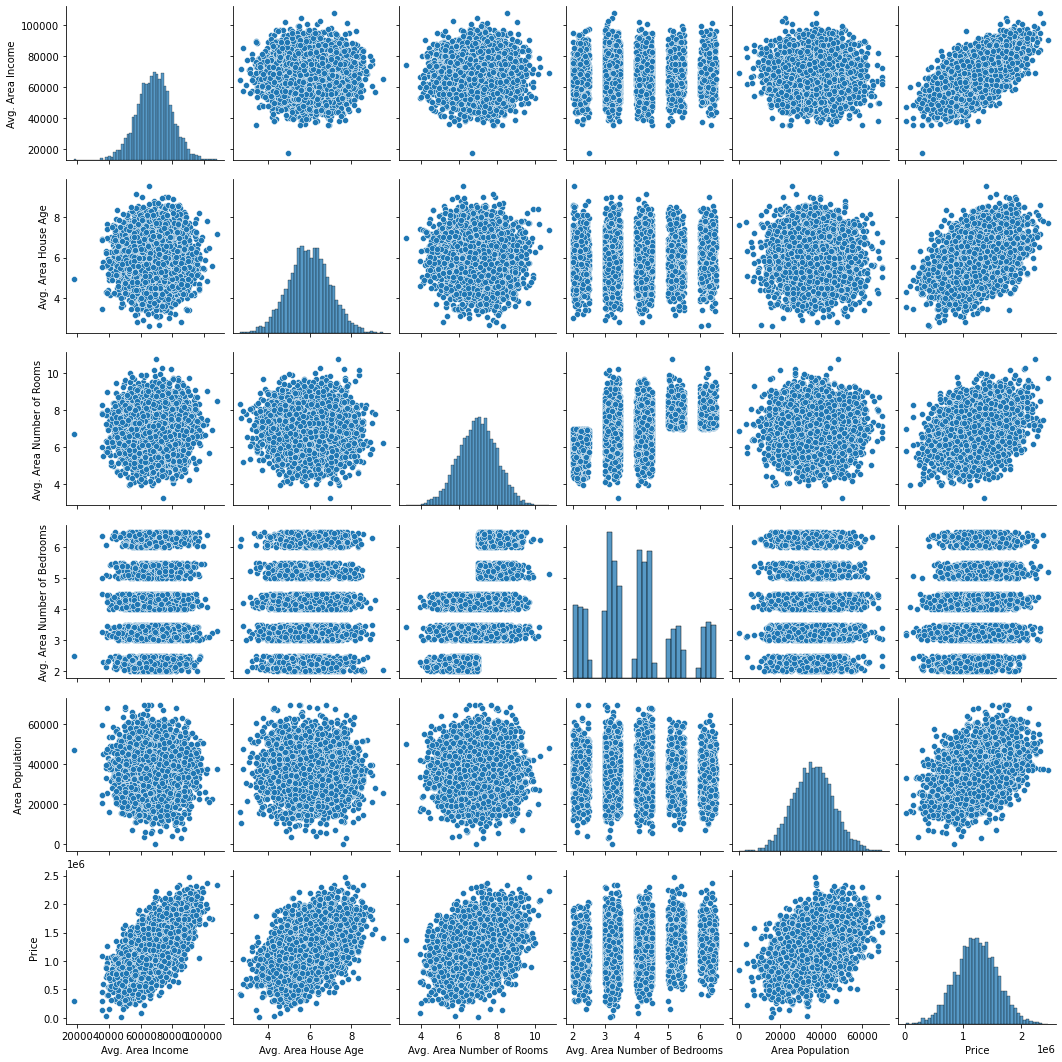

In [27]:
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'Avg. Area Income'}>,
        <AxesSubplot:title={'center':'Avg. Area House Age'}>,
        <AxesSubplot:title={'center':'Avg. Area Number of Rooms'}>],
       [<AxesSubplot:title={'center':'Avg. Area Number of Bedrooms'}>,
        <AxesSubplot:title={'center':'Area Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

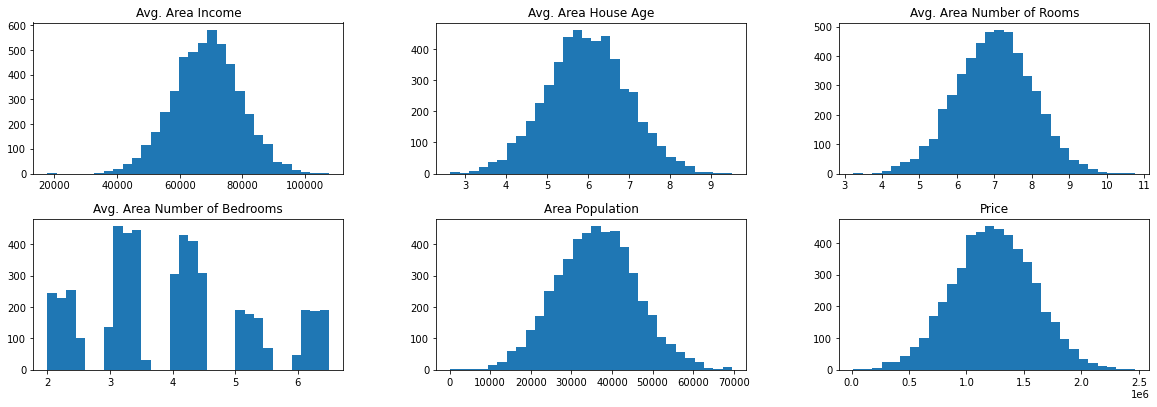

In [28]:
data.hist(figsize=(20,10), grid=False, layout=(3, 3), bins = 30)

<AxesSubplot:>

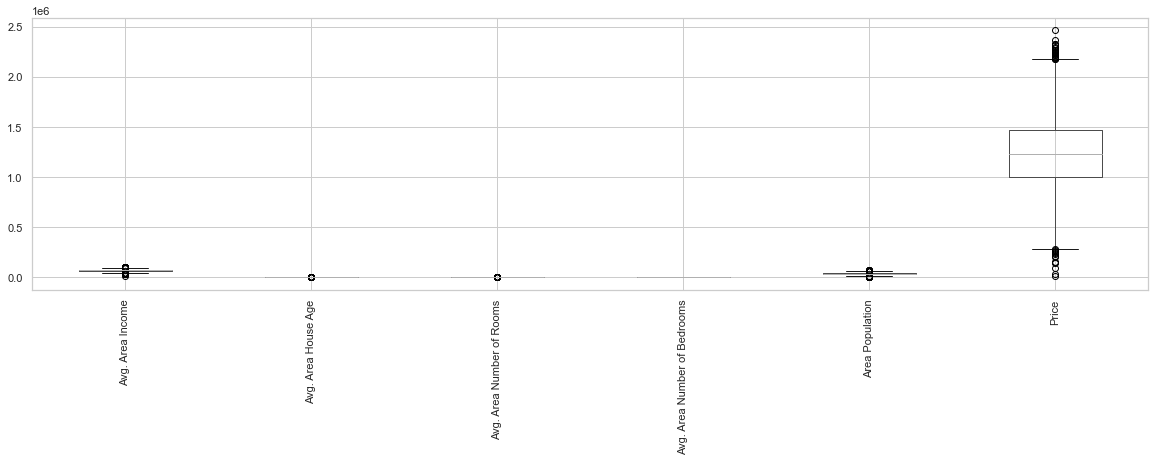

In [171]:
data.boxplot(rot=90, figsize=(20,5))

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

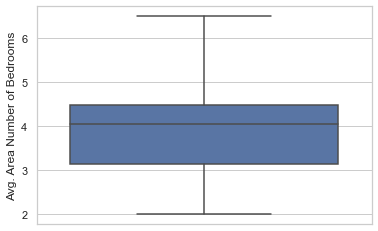

In [177]:
#Because the boxplot for Avg. Area Number of Bedrooms not clear above (different scale) ...
sns.boxplot(y=data['Avg. Area Number of Bedrooms'])

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

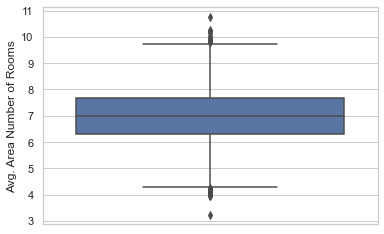

In [178]:
#Because the boxplot for Avg. Area Number of Rooms not clear above (different scale) ...
sns.boxplot(y=data['Avg. Area Number of Rooms'])

<AxesSubplot:ylabel='Avg. Area House Age'>

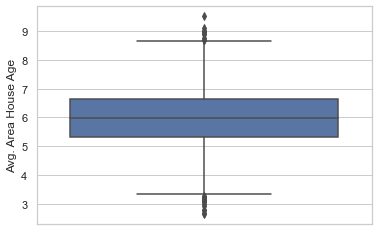

In [179]:
#Because the boxplot for Avg. Area House Age not clear above (different scale) ...
sns.boxplot(y=data['Avg. Area House Age'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

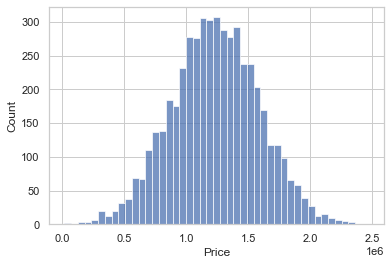

In [139]:
# Viusalize by histogram for Price feature ONLY ...
sns.histplot(data['Price'])

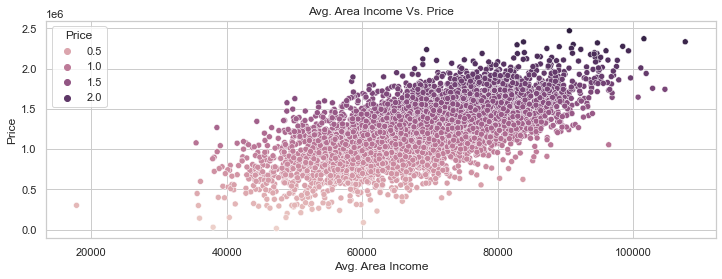

<Figure size 432x288 with 0 Axes>

In [240]:
plt.figure(figsize=(12,4))

plt.title('Avg. Area Income Vs. Price')
sns.scatterplot(x=data['Avg. Area Income'],y=data['Price'],hue=data['Price'])
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

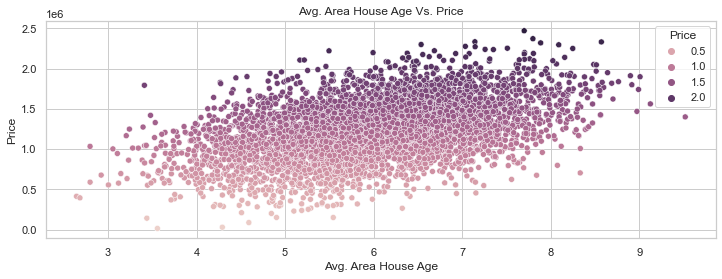

<Figure size 432x288 with 0 Axes>

In [237]:
plt.figure(figsize=(12,4))

plt.title('Avg. Area House Age Vs. Price')
sns.scatterplot(x=data['Avg. Area House Age'],y=data['Price'],hue=data['Price'])
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

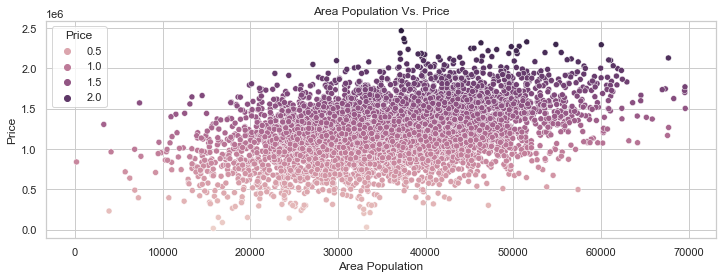

<Figure size 432x288 with 0 Axes>

In [246]:
plt.figure(figsize=(12,4))

plt.title('Area Population Vs. Price')
sns.scatterplot(x=data['Area Population'],y=data['Price'],hue=data['Price'])
plt.xlabel('Area Population')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

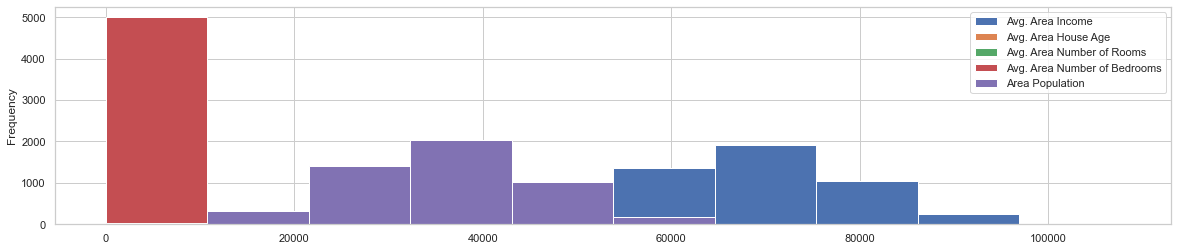

In [188]:
plot3=data.plot(x='Price',kind='hist',figsize=(20,4))

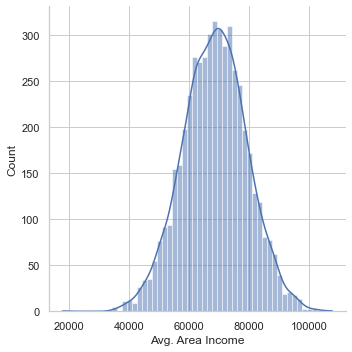

In [129]:
sns.displot(x=data['Avg. Area Income'], kde=True)

        - Though features are normaly distributed, Except one (Avg. Area Number of Bedrooms)
        - None of the features have minimum = 0 
        - Some feature has difference scale range
        - There is 50% of  Avg. Area House Age between 5 & 7 years .
        - There is 75% of  Avg. Area Number of Bedrooms more than 3  rooms.
        - There is 75% of  Avg. Area Number of Rooms more than 6  rooms .
        - Visually from Scatterplot there are a positive relation between Price & Avg. Area Income , Price & Avg. Area House Age ,and Price & Area Population.
        

# Linear Regression

In [59]:
# Splitting the dataset into the Training set and Test set ... 
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [60]:
# Fitting Linear Regression to the Training set ...
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [61]:
#Calculating the coefficients of x features ...
regressor.coef_

array([2.16502503e+01, 1.65928462e+05, 1.21181356e+05, 1.79898513e+03,
       1.52326050e+01])

In [62]:
#Calculating the coefficients of x (in DataFrame) ...
coeff_df = pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.650250
Avg. Area House Age,165928.462269
Avg. Area Number of Rooms,121181.355539
Avg. Area Number of Bedrooms,1798.985135
Area Population,15.232605


In [63]:
#Calculating the intercept ...
regressor.intercept_

-2649004.4356372757

Text(0.5, 1.0, 'Actual Vs. Predicted ')

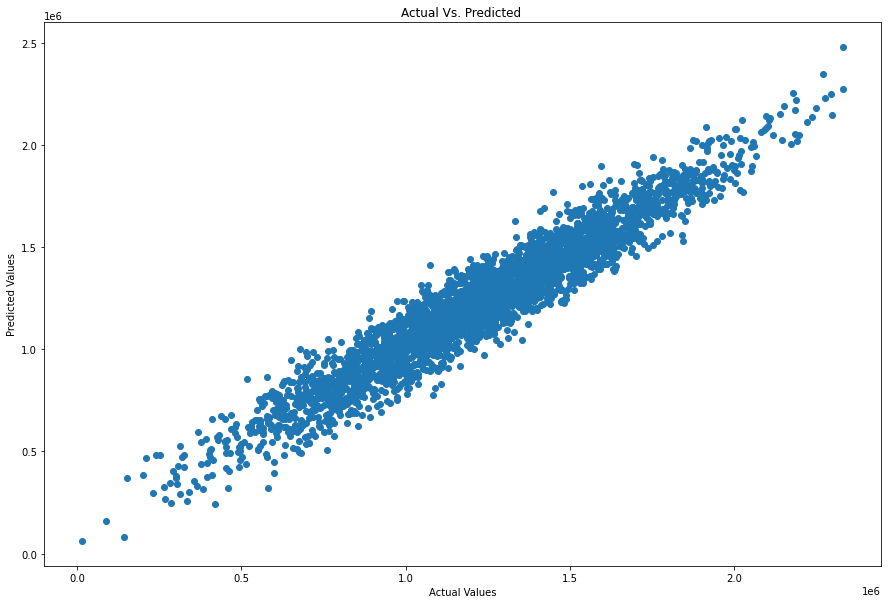

In [72]:
#plot the predicted values for training set ...
y_prtrain=regressor.predict(x_train)
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_prtrain) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs. Predicted (Training set)')

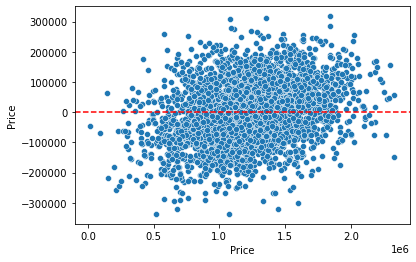

In [81]:
#plot the Residual for training set(2)...
sns.scatterplot(x=y_train, y=y_train-y_prtrain)
plt.axhline(y=0, color='r', ls='--')

In [64]:
# Predicting the Test set results ...
y_pred = regressor.predict(x_test)
y_pred

array([ 970303.92158409,  954339.13558467,  907322.75963769, ...,
       1896101.96296443, 1073937.7920265 , 1076934.070037  ])

In [65]:
#check the predicted value for the first row ...
regressor.predict([[79545.458574,5.682861,7.009188,4.09,23086.800503]])

array([1224535.90754662])

In [86]:
# Accuracy assessment:
regressor.score(x,y)

0.918013459741144

In [88]:
# Accuracy assessment: R2 for trainging set ...
r2_score(y_train,y_prtrain) 

0.9171739280718846

In [89]:
#R2 for the predicted values ...
r2_score(y_test,y_pred) 

0.9196140906860597

Text(0.5, 1.0, 'Actual Vs. Predicted ')

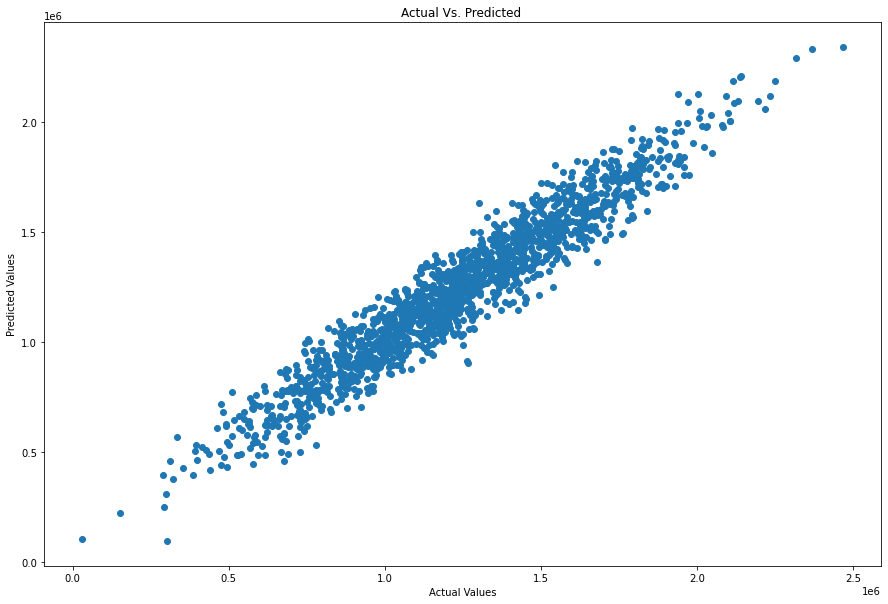

In [68]:
#plot the result ...
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs. Predicted ')

In [39]:
#find the Residuals ...
resid=pd.DataFrame({'Actual Value:':y_test , 'Predicted Value:':y_pred,'Difference :':y_test-y_pred })
resid

,Actual Value:,Predicted Value:,Difference :
398,8.942511e+05,9.703039e+05,-76052.852948
3833,9.329794e+05,9.543391e+05,-21359.774963
4836,9.207479e+05,9.073228e+05,13425.151650
4572,6.918549e+05,4.923017e+05,199553.176594
636,7.327332e+05,7.180177e+05,14715.560821
...,...,...,...
4004,1.408428e+06,1.403516e+06,4911.952123
418,1.306459e+06,1.226475e+06,79983.477418
1939,1.930806e+06,1.896102e+06,34703.983730
988,9.300116e+05,1.073938e+06,-143926.221139


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

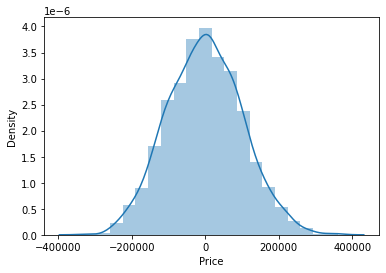

In [40]:
#plot the Residual (1)...
sns.distplot((y_test-y_pred) ,bins=20)

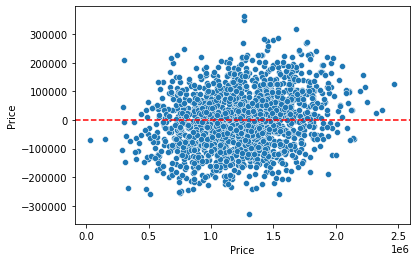

In [46]:
#plot the Residual (2)...
sns.scatterplot(x=y_test, y=y_test-y_pred)
plt.axhline(y=0, color='r', ls='--')

In [247]:
## Regression Evaluation Metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 81128.01228231817
MSE: 10242581064.461788
RMSE: 101205.63751324225
